# Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

# Data Preparation

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv -O data.csv

--2025-11-05 22:18:54--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M   233KB/s    in 6.2s    

2025-11-05 22:19:01 (233 KB/s) - ‘data.csv’ saved [1475504/1475504]



In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [5]:
df.columns= df.columns.str.lower().str.replace(' ', '_')

In [6]:
df.head() #we need to standardize the data/records

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
strings=list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    

In [9]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

# Exploratory data analysis

In [10]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [11]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

# Distribution of price

In [12]:
df['msrp']

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: msrp, Length: 11914, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

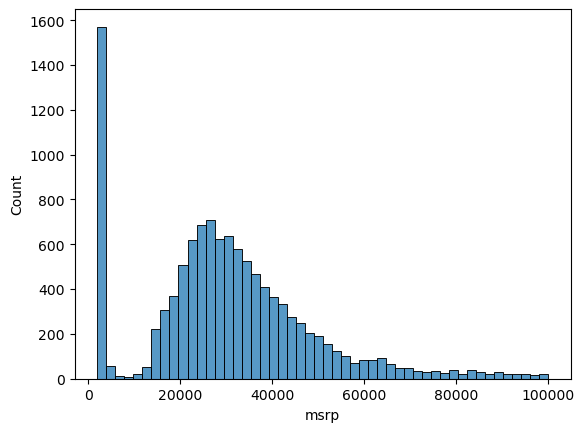

In [14]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.show()

In [15]:
np.log1p([0,1, 10,1000,100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [16]:
price_logs=np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

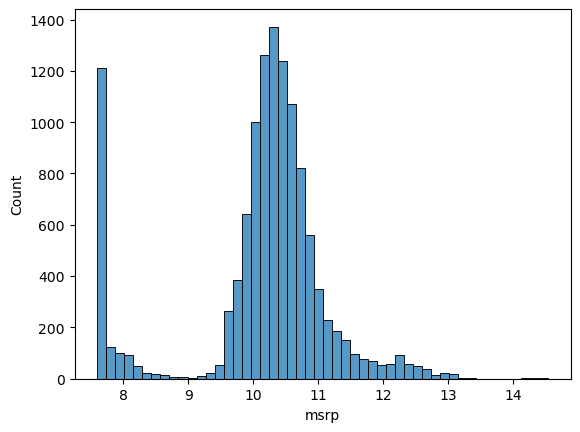

In [17]:
sns.histplot(price_logs, bins=50) #model do better in normal dristribution
plt.show()

# missing values

In [18]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up the validation framework

Data Model ->Train: 60%, Validation: 20% and Test: 20%

In [19]:
# this approach is lefting few values due to approximations i.e check n_train
n = len(df)

n_val= int(n * 0.2)
n_test= int(n * 0.2)
n_train= int(n * 0.6)

n, n_val + n_test + n_train

(11914, 11912)

In [20]:
# this approach is perfect check the  n_train
n = len(df)

n_val= int(n * 0.2)
n_test= int(n * 0.2)
n_train= n - n_val - n_test

n, n_val + n_test + n_train

(11914, 11914)

In [21]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [22]:
df.iloc[11910: ]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920
11913,lincoln,zephyr,2006,regular_unleaded,221.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,26,17,61,28995


In [23]:
df_train= df.iloc[n_train: ]
df_val = df.iloc[n_train: n_train + n_val]
df_test= df.iloc[n_train + n_val: ]


In [24]:
idx=np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)


In [25]:
df_train= df.iloc[idx[: n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test= df.iloc[idx[n_train + n_val: ]]


In [26]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [27]:
len(df_train), len(df_test), len(df_val)

(7150, 2382, 2382)

In [28]:
#this will reset the index number to start with zero
df_train= df_train.reset_index(drop=True)
df_val= df_val.reset_index(drop=True)
df_test= df_test.reset_index(drop=True)

In [29]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [30]:
y_train=np.log1p(df_train.msrp.values)
y_val=np.log1p(df_val.msrp.values)
y_test=np.log1p(df_test.msrp.values)

In [31]:
#delete msrp from the dataframe because it will be used as y, not in the side of training and validation i.e t(x)~y
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [32]:
len(y_train)

7150

# Linear Regression 

In [33]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [34]:
xi=[453,11,86]

In [35]:
w0 = 7.17
w=[0.01, 0.04, 0.002]

def linear_regression(xi):
    n= len(xi)

    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred

In [36]:
linear_regression(xi)

12.312

In [37]:
np.expm1(12.312) #we do exponential to convert back our result to original number 

np.float64(222347.2221101062)

In [38]:
np.log1p(222347.2221101062) #proof

np.float64(12.312)

# Linear regression vector form

In [39]:
def dot(xi,w):
    n= len(xi)

    res= 0.0
    for i in range(n):
        res = res + xi[j] * w[j]
    return res

In [40]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [41]:
w_new = [w0] + w

In [42]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [43]:
def linear_regression(xi):
    xi= [1] + xi
    return dot(xi,  w_new)

In [44]:
#linear_regression(xi)  will have the answer: 12.312

In [45]:
w0 = 7.17
w=[0.01, 0.04, 0.002]
w_new = [w0] + w

In [46]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 =[1, 145, 11, 86]

X =  [x1, x2, x10]
X = np.array(X)

In [47]:
X.dot(w_new)

array([12.38 , 13.552,  9.232])

## Training a linear regression model

In [48]:
def train_linear_regression(X, y):
    pass

In [49]:
X= [
    [148, 24, 1385],
    [132, 25, 2031],
    [145, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 145,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [50]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
X=np.column_stack([ones, X])

In [52]:
y = [100, 200, 150, 250,100, 200, 150, 250, 120]

In [53]:
XTX= X.T.dot(X)
XTX

array([[9.000000e+00, 1.801000e+03, 2.300000e+02, 4.676000e+03],
       [1.801000e+03, 5.122870e+05, 4.072700e+04, 6.920520e+05],
       [2.300000e+02, 4.072700e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 6.920520e+05, 1.188030e+05, 6.359986e+06]])

In [54]:
XTX_inv = np.linalg.inv(XTX)

In [55]:
XTX.dot(XTX_inv).round(1) #confirming

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [-0., -0.,  1., -0.],
       [-0.,  0.,  0.,  1.]])

In [56]:
w_full = XTX_inv.dot(X.T).dot(y)

In [57]:
w0 = w_full[0]
w = w_full[1:]

In [58]:
w0, w

(np.float64(222.2871772467269), array([-0.09491532, -1.20805481, -0.00679844]))

In [66]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.pinv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)


    
    return w_full[0], w_full[1:]

    
    

In [67]:
train_linear_regression(X, y)

(np.float64(111.14358862822542),
 array([ 1.11143589e+02, -9.49153224e-02, -1.20805481e+00, -6.79843736e-03]))